# **Bank Marketing Campaign Analysis**

**By Jeremy Anthony Gunawan**

# **1. Business Problem Understanding**

source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset


**Context**

Banking is a fundamental cornerstone of modern economies, offering a range of financial services to both individuals and businesses. One of the key challenges faced by banks worldwide is the ever-growing competition, not only from fellow traditional banks but also from newer fintech companies. To maintain a stable financial footing, it is essential for banks to increase their deposits, which can then be used to fund loans and other investments.

Banks provide an array of products, ranging from basic savings and checking accounts to complex financial instruments and loans. One specific product that is of particular interest, especially in this context, is the term deposit.

A term deposit is a fixed-term investment that allows customers to deposit their money for a specified period, ranging from a few months to several years. In return, they receive interest at a predetermined rate, which is often higher than standard savings accounts. At the end of the term, the customer receives their initial deposit along with the accrued interest. The advantage for the bank is that these deposits are often locked in for the term, providing the bank with stable funds.

Given the importance of term deposits for a bank's liquidity and overall financial health, banks often use marketing campaigns to attract more customers to these products. In the case of the dataset describing the Portugal bank's efforts, the primary method of reaching out to potential customers was through direct phone calls.

These telemarketing campaigns would involve bank representatives calling existing or potential clients, explaining the benefits of term deposits, and attempting to persuade them to commit to one. The goal is not merely to inform but to convert these calls into tangible financial commitments, thereby increasing the bank's term deposit numbers.

This dataset sheds light on the results of such telemarketing efforts. By analyzing this data, one can determine various factors that influence a customer's decision to accept or decline the offer of a term deposit. Such factors could include the demographics of the customer, the timing and duration of the call, the number of contacts made, economic indicators at the time of the call, and more.

Understanding these factors is crucial for any bank. By identifying patterns of success (or failure), the bank can refine its future marketing strategies, targeting specific demographics more effectively, adjusting the timing or frequency of calls, or even altering the terms of the deposit being offered. In essence, this dataset provides a roadmap for optimizing telemarketing campaigns in the future.


Target:

yes: Customer **agrees** to make a term deposit to the portugal bank.
no: Bank agents **fail** to convince customers to make a deposit.


**Problem statement:**

Conducted campaigns in a form of bank telemarking data in the portugal bank to convince clients to make deposits seem not working as expected and it can consume lots of time and energy as the bank agents attempt to make phone calls to all the customers. As a data scientist, we are going to help the telemarketing bank team to make a more approachable and efficient way to convince the customers especially those potential, meaning that they are those who are predicted by our machine learning model to make the term deposits.


**Goals**

Based on the problem, the bank attempts and try to convince their clients to accept the term deposits offer. There are several factors (feature importance) that influence whether the customer accepts or reject the term deposits offer. Therefore, we are going to analyze those factors that might affect the success rate of the offer and prioritize those potential customers to increase the success rate of the campaigns by doing these three steps:

1. Create a classification model machine learning
2. analyze those feature importance of those customers to know those "potential" customers.
3. By doing this, it is expected the bank can reduce their telemarketing campaign cost by targeting those priority customers which will create a more effective and efficient campaign.

**Analytic Approach:**

1. Analyse the major factor that influence the success rate of the customers.
2. Prioritize potential customers that might accept the offer.
3. Creating a classification model that will help the bank to increase their success rate of the campaigns.

**Metrics Evaluation:**

1. Precision: This metric is particularly useful when the cost of false positives is high. For example, if you are conducting a promotional campaign and don't want to waste resources on customers who are unlikely to accept the offer.





# **2. Data Understanding**

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| Age | Numeric | The age of the client |
| Job | Categorical | The type of job the client has. Categories include admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown |
| Marital | Categorical | The marital status of the client. Categories include divorced, married, single, unknown |
| Education | Categorical | The education level of the client. Categories include basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown |
| Default | Categorical | Whether the client has credit in default. Categories include no, yes, unknown |
| Housing | Categorical | Whether the client has a housing loan. Categories include no, yes, unknown |
| Loan | Categorical | Whether the client has a personal loan. Categories include no, yes, unknown |
| Contact | Categorical | Type of contact communication. Categories include cellular, telephone |
| Month | Categorical | Last contact month of the year. Categories include jan, feb, mar, ..., nov, dec |
| Day_of_week | Categorical | Last contact day of the week. Categories include mon, tue, wed, thu, fri |
| Duration | Numeric | Last contact duration, in seconds |
| Campaign | Numeric | Number of contacts performed during this campaign and for this client |
| Pdays | Numeric | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| Previous | Numeric | Number of contacts performed before this campaign and for this client |
| Poutcome | Categorical | Outcome of the previous marketing campaign. Categories include failure, nonexistent, success |
| Emp.var.rate | Numeric | Employment variation rate - quarterly indicator |
| Cons.price.idx | Numeric | Consumer price index - monthly indicator |
| Cons.conf.idx | Numeric | Consumer confidence index - monthly indicator |
| Euribor3m | Numeric | Euribor 3 month rate - daily indicator |
| Nr.employed | Numeric | Number of employees - quarterly indicator |
| Y | Binary | Has the client subscribed a term deposit? Categories include yes, no |

In [2]:
#library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
import category_encoders as ce
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier


# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# cross validation
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



# **3. Load Dataset**

In [99]:
#load dataset
df = pd.read_csv('bank-additional-full.csv',sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **4. Overview Data**

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [101]:
#Numerical statistical summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [102]:
# Categorical statistical summary
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# **5. Data Cleaning**

**Check missing values**

In [103]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**There are no missing values at first because the missing values are labeled 'unknown', so we need to replace the 'unknown' values into missing values.**

In [104]:
df.replace('unknown', pd.NA, inplace=True)

In [105]:
#recheck again after replacing 'unknown' into missing values
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [106]:
#show the percentage of the missing values of every column
print("Missing values of each column")
print(f"job: {df['job'].isnull().sum() / len(df) * 100:.2f}%")
print(f"marital: {df['marital'].isnull().sum() / len(df) * 100:.2f}%")
print(f"education: {df['education'].isnull().sum() / len(df) * 100:.2f}%")
print(f"default: {df['default'].isnull().sum() / len(df) * 100:.2f}%")
print(f"housing: {df['housing'].isnull().sum() / len(df) * 100:.2f}%")
print(f"loan: {df['loan'].isnull().sum() / len(df) * 100:.2f}%")


Missing values of each column
job: 0.80%
marital: 0.19%
education: 4.20%
default: 20.87%
housing: 2.40%
loan: 2.40%


In [107]:
#show the columns that have missing values.
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,<NA>,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,<NA>,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,NaN,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,NaN,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,NaN,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,NaN,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,NaN,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


**Takeaways:**
1. There are 6 columns that have missing values and the percentage of missing values for each of the 6 columns has been stated above.
2. It is seen that only default that has missing values over 5%.
3. We are just going to ignore those 5 columns that have missing values under 5%.
4. Explore more on the default because the column has missing values over 20%.

In [12]:
#check if there is a strong correlation between y(target value) and default. if there is no strong correlation, we will just drop the column.
import pandas as pd
from scipy.stats import chi2_contingency

# Create a crosstab (contingency table)
contingency = pd.crosstab(df['default'], df['y'])

# Perform the Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency)

print(f"Chi-squared Value = {chi2}")
print(f"P-value = {p}")

# You can make a decision based on the p-value.
if p < 0.05:
    print("The two categorical variables are dependent (associated).")
else:
    print("The two categorical variables are independent (not associated).")

Chi-squared Value = 0.0
P-value = 1.0
The two categorical variables are independent (not associated).


**From the chi square test (categorical data test), there is no strong correlation between the two columns, so we are just going to drop the column**


In [13]:
#drop the default column, because it has no strong correlation.
df = df.drop(columns=['default'])

In [14]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Check duplicated data**

In [15]:
print(f'total duplicated data in the data frame: {df.duplicated().sum()}')
df[df.duplicated()]

total duplicated data in the data frame: 14


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
5664,56,blue-collar,married,basic.4y,no,no,telephone,may,mon,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12261,36,retired,married,<NA>,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
19608,33,admin.,married,university.degree,yes,no,cellular,aug,thu,59,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
20216,55,services,married,high.school,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


In [16]:
#Drop those 14 duplicated data
df.drop_duplicates(inplace=True) 

**Based on domain knowledge, to handle these 5 missing columns, we are going to replace all the missing values in the columns: job, marital and education with "others" and we are going to drop those missing columns in housing and loan.**

In [17]:
df.isna().sum()

age                  0
job                330
marital             80
education         1730
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [18]:
#fill the missing values in the three columns with others.
df['job'].fillna('others', inplace=True)
df['marital'].fillna('others', inplace=True)
df['education'].fillna('others', inplace=True)

In [19]:
# Drop rows with missing values in 'housing' and 'loan'
df.dropna(subset=['housing', 'loan'], inplace=True)

# reset index 
df.reset_index(drop=True, inplace=True)

In [20]:
#final cleaned dataset.
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40179,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
40180,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40181,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40182,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
#Check again the information again in a dataframe after cleaning the data.

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[51, 48]"
1,job,object,0,0.0,12,"[retired, student]"
2,marital,object,0,0.0,4,"[married, divorced]"
3,education,object,0,0.0,8,"[high.school, university.degree]"
4,housing,object,0,0.0,2,"[yes, no]"
5,loan,object,0,0.0,2,"[no, yes]"
6,contact,object,0,0.0,2,"[cellular, telephone]"
7,month,object,0,0.0,10,"[dec, jul]"
8,day_of_week,object,0,0.0,5,"[fri, mon]"
9,duration,int64,0,0.0,1535,"[369, 1167]"


# **6. EXPLANATORY DATA ANALYSIS**

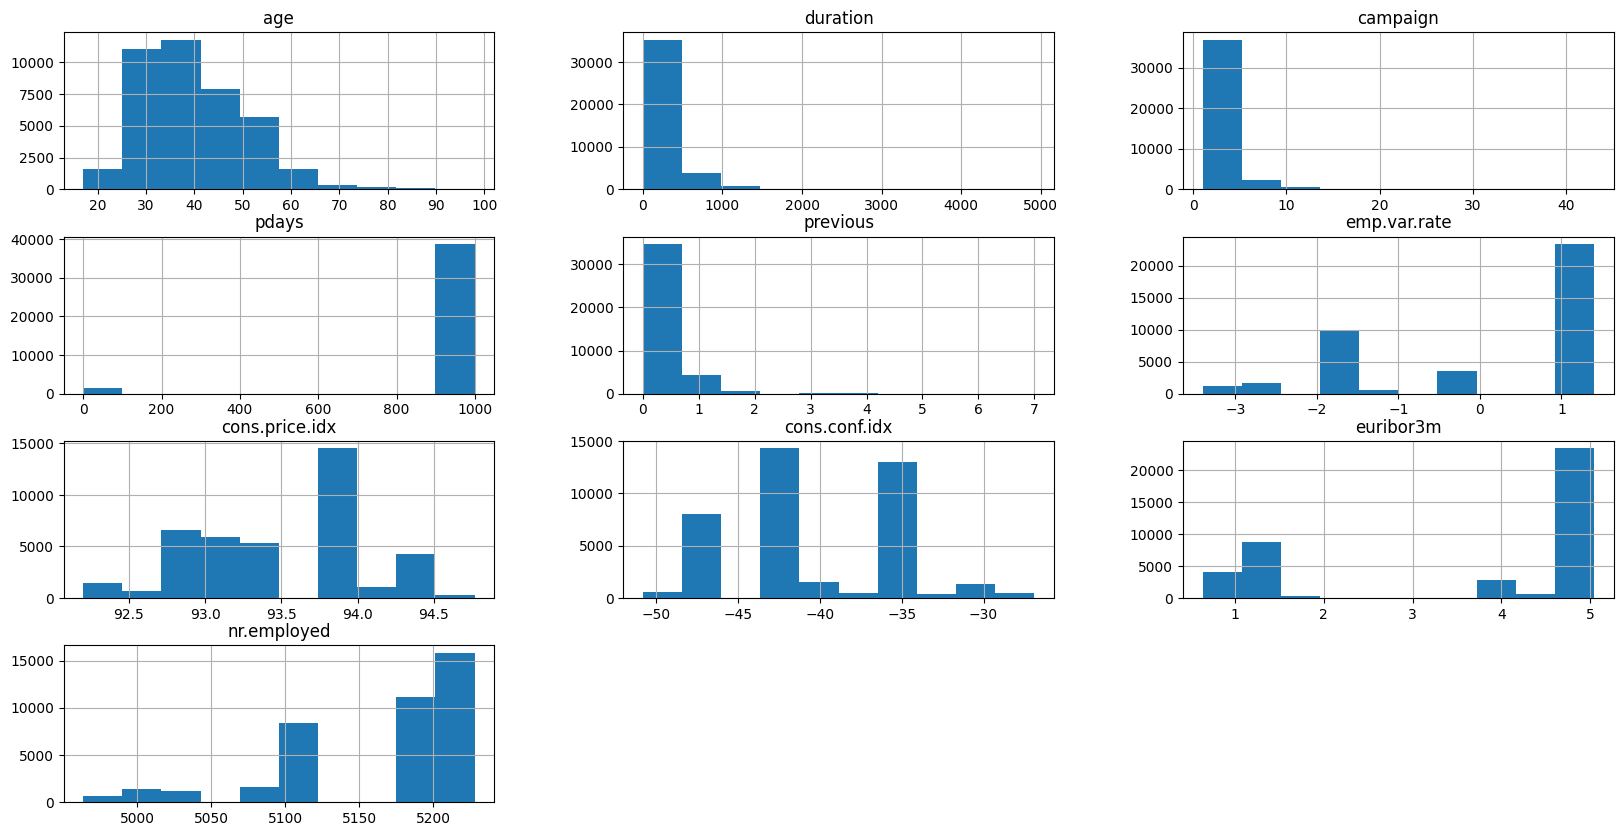

In [22]:
# Creating histogram for those numerical columns that might have an influence towards accepting/rejecting the offer.
df.hist(figsize= [20,10])
plt.show()

# **Influence of All Numerical Columns**

In [23]:
# Label encoding target variable
# converts label/words to numeric form without affecting dimensionality
# y- yes=1, no=0
df['y'] = df['y'].replace('yes', 1)
df['y'] = df['y'].replace('no', 0)

#make the y a numerical type first to see the correlation between those other numerical columns.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40184 entries, 0 to 40183
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40184 non-null  int64  
 1   job             40184 non-null  object 
 2   marital         40184 non-null  object 
 3   education       40184 non-null  object 
 4   housing         40184 non-null  object 
 5   loan            40184 non-null  object 
 6   contact         40184 non-null  object 
 7   month           40184 non-null  object 
 8   day_of_week     40184 non-null  object 
 9   duration        40184 non-null  int64  
 10  campaign        40184 non-null  int64  
 11  pdays           40184 non-null  int64  
 12  previous        40184 non-null  int64  
 13  poutcome        40184 non-null  object 
 14  emp.var.rate    40184 non-null  float64
 15  cons.price.idx  40184 non-null  float64
 16  cons.conf.idx   40184 non-null  float64
 17  euribor3m       40184 non-null 

In [25]:
df.select_dtypes(include=['float64', 'int64']).corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000070,0.004660,-0.035230,0.025104,-0.000841,0.000839,0.129272,0.010303,-0.018225,0.030309
duration,-0.000070,1.000000,-0.071534,-0.047540,0.019311,-0.026750,0.006360,-0.008558,-0.031213,-0.042891,0.405061
campaign,0.004660,-0.071534,1.000000,0.052472,-0.079652,0.151669,0.128957,-0.014196,0.136002,0.145028,-0.065757
pdays,-0.035230,-0.047540,0.052472,1.000000,-0.587092,0.271583,0.079938,-0.092303,0.297032,0.372255,-0.323632
previous,0.025104,0.019311,-0.079652,-0.587092,1.000000,-0.420447,-0.204233,-0.050546,-0.453776,-0.499870,0.228649
emp.var.rate,-0.000841,-0.026750,0.151669,0.271583,-0.420447,1.000000,0.774999,0.197128,0.972248,0.907119,-0.297352
cons.price.idx,0.000839,0.006360,0.128957,0.079938,-0.204233,0.774999,1.000000,0.059684,0.687835,0.521592,-0.135623
cons.conf.idx,0.129272,-0.008558,-0.014196,-0.092303,-0.050546,0.197128,0.059684,1.000000,0.278624,0.101658,0.055267
euribor3m,0.010303,-0.031213,0.136002,0.297032,-0.453776,0.972248,0.687835,0.278624,1.000000,0.945235,-0.306243
nr.employed,-0.018225,-0.042891,0.145028,0.372255,-0.499870,0.907119,0.521592,0.101658,0.945235,1.000000,-0.352950


**There are 6 numerical columns that have an influence >20% to y or targeted variable:**

1. duration (40.5%)
2. nr.employed (35.2%)
3. pdays (32.36%)
4. eubibor3m (30.6%)
5. emp.var.rate (29.7%)
6. previous (22.8%)


Therefore, we are going to explore more on those columns

In [26]:
#change back to the initial value to see the correlation between the data, after all we finish, we are going to change back again for feature engineering

df['y'] = df['y'].replace(1, 'yes')
df['y'] = df['y'].replace(0, 'no')

In [27]:
#value counts of y or target
display(df['y'].value_counts())

print('percentage of accepting deposit:')
df['y'].value_counts()/len(df['y']) * 100

y
no     35652
yes     4532
Name: count, dtype: int64

percentage of accepting deposit:


y
no     88.721879
yes    11.278121
Name: count, dtype: float64

### **1. Duration**

Last contact duration, in seconds

**we are not going to use duration in our machine learning modeling because duration is counted after making the call.**

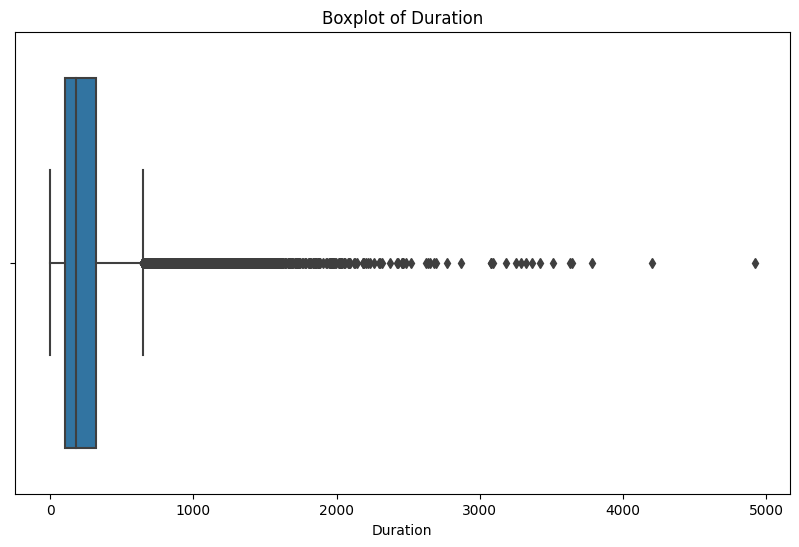

In [28]:
df['duration'].value_counts()
plt.figure(figsize=(10,6))
sns.boxplot(x=df['duration'])

plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

In [29]:
# 1. Calculate Q1 and Q3
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

# 2. Compute IQR
IQR = Q3 - Q1

# 3. Define extreme outliers bounds.
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# 4. Calculate percentage of outliers
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
percentage_of_outliers = (len(outliers) / len(df)) * 100

print(f"The percentage of outliers is: {percentage_of_outliers:.2f}%")

outliers

The percentage of outliers is: 2.51%


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36,52,technician,married,basic.9y,yes,no,telephone,may,mon,1666,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
74,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
81,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
86,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
162,39,services,divorced,high.school,no,no,telephone,may,mon,2033,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40009,24,blue-collar,single,high.school,no,no,cellular,oct,thu,1032,1,3,1,success,-1.1,94.601,-49.5,1.025,4963.6,yes
40117,46,admin.,single,university.degree,yes,no,cellular,nov,tue,1166,3,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no
40118,34,technician,married,others,no,no,cellular,nov,tue,985,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
40119,36,blue-collar,single,basic.6y,no,no,cellular,nov,tue,1556,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes


In [30]:
outliers['y'].value_counts()


y
yes    600
no     408
Name: count, dtype: int64

In [31]:
# remove the outliers in the duration column
df_duration = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]


**Note that I didn't remove the extreme outliers of the duration because 608 out of 1008 accept the term deposits offer, this will really be helpful in the modelling process**

In [32]:
print(f"range of the duration is between: {df_duration['duration'].min()} - {df_duration['duration'].max()}")

range of the duration is between: 0 - 974


In [33]:
#create a binary encoding for duration.

"Convert Duration Call into 5 category"

df_duration['duration']

def duration_ordinal(df_duration):
    df_duration.loc[df['duration'] <= 195, 'duration'] = 1
    df_duration.loc[(df['duration'] > 195) & (df_duration['duration'] <= 380)  , 'duration'] = 2
    df_duration.loc[(df['duration'] > 380) & (df_duration['duration'] <= 575)  , 'duration'] = 3
    df_duration.loc[(df['duration'] > 575) & (df_duration['duration'] <= 780), 'duration'] = 4
    df_duration.loc[df['duration']  > 780, 'duration'] = 5
    return df_duration

duration_ordinal(df_duration)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40179,73,retired,married,professional.course,yes,no,cellular,nov,fri,2,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
40180,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,3,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40181,56,retired,married,university.degree,yes,no,cellular,nov,fri,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40182,44,technician,married,professional.course,no,no,cellular,nov,fri,3,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [34]:
df_duration['duration'].value_counts()

duration
1    21678
2    10852
3     3947
4     1867
5      832
Name: count, dtype: int64

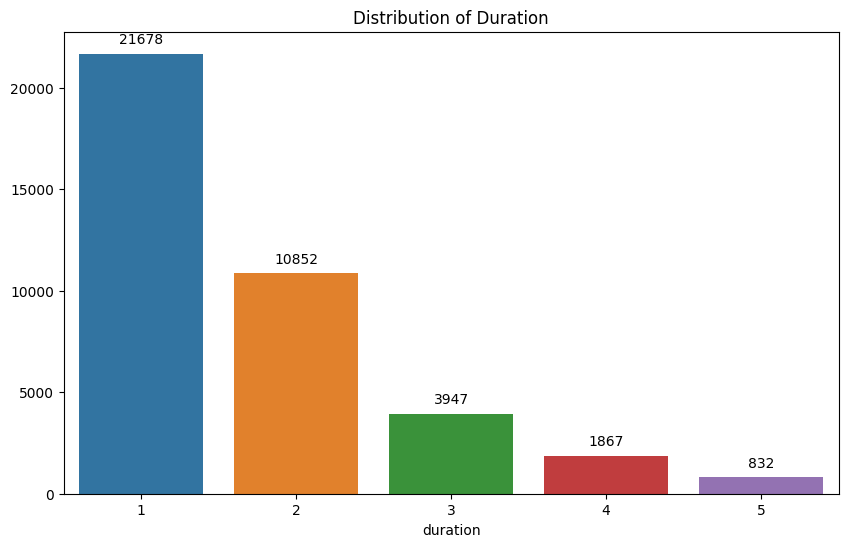

In [35]:
plt.figure(figsize=(10, 6))

duration_figure = df_duration['duration'].value_counts()
barplot = sns.barplot(x=duration_figure.index, y=duration_figure.values)

plt.title('Distribution of Duration')

# Annotate each bar with its value
for idx, value in enumerate(duration_figure.values):
    plt.annotate(value, 
                 (idx, value), 
                 ha='center', 
                 va='bottom', 
                 fontsize=10, 
                 xytext=(0,5), 
                 textcoords='offset points')

plt.show()

In [108]:
#see if the longer the duration affect the acceptance of the term deposits.
display(df_duration['y'].groupby(df_duration['duration']).value_counts().reset_index())


grouped_df = df_duration['y'].groupby(df_duration['duration']).value_counts().reset_index(name='count')

# Pivot the table so that 'yes' and 'no' become columns, with 'duration' as the index
pivot_df = grouped_df.pivot(index='duration', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

# Resetting the index to have 'duration' as a column
result = pivot_df.reset_index()[['duration', 'success_rate']].sort_values(by='success_rate', ascending=False)

result

,duration,y,count
0,1,no,21003
1,1,yes,675
2,2,no,9595
3,2,yes,1257
4,3,no,3091
5,3,yes,856
6,4,no,1157
7,4,yes,710
8,5,yes,434
9,5,no,398


y,duration,success_rate
4,5,0.521635
3,4,0.380289
2,3,0.216874
1,2,0.115831
0,1,0.031138


**Findings:**

1. it can be seen that the longer the duration leads to a higher percentage in accepting the term deposits.
2. The order from duration 1-5 shows that the longest duration category, which is 5 has a success rate of 52.6%
3. the lowest duration, which is 1, only has a 3% success rate.

### 2. nr.employed

Number of employees - quarterly indicator

The nr.employed column represents a quarterly indicator for the number of employees, which is expressed in thousands. It explains the current situation of the labor market and can serve as an indicator of the overall economic health.

The values provided are the number of employees (expressed in thousands) at the time of the observation, and the numbers associated with each value represent the count of clients or observations that were recorded when the nr.employed was at that specific level.

examples:

15843 clients - nr.employed value of 5228.1:
At the time when the sector had approximately 5,228,100 employees, there were 15,843 observations or clients recorded.

8346 clients - nr.employed value of 5099.1:

When the employment was at about 5,099,100 people, 8,346 observations or clients were recorded.

It gives insights into the state of the economy or sector. For instance, if "nr.employed" values rise over time, it could indicate economic growth as more people are employed. Conversely, if "nr.employed" values drop, it might suggest economic contraction.

In [37]:
df['nr.employed'].value_counts()


nr.employed
5228.1    15843
5099.1     8346
5191.0     7541
5195.8     3615
5076.2     1612
5017.5     1045
4991.6      755
5008.7      636
4963.6      615
5023.5      166
5176.3       10
Name: count, dtype: int64

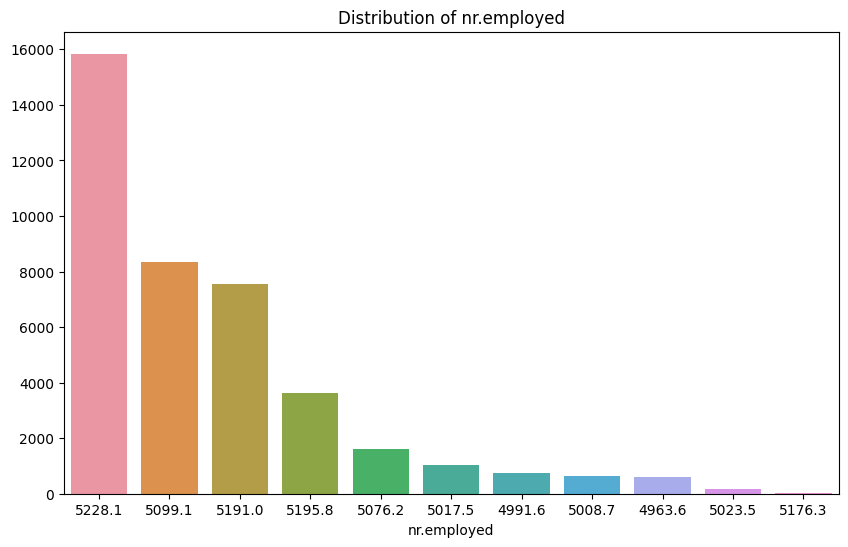

In [38]:
plt.figure(figsize=(10, 6))

# Sort the value counts
nremployed_figure = df['nr.employed'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=nremployed_figure.index, y=nremployed_figure.values, order=nremployed_figure.index)

plt.title('Distribution of nr.employed')
plt.show()


In [39]:
#see if more employees coming in a certain quarter affect the success rate

display(df['y'].groupby(df['nr.employed']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['nr.employed']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='nr.employed', columns='y', values='count')


pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])


result = pivot_df.reset_index()[['nr.employed', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,nr.employed,y,count
0,4963.6,no,326
1,4963.6,yes,289
2,4991.6,yes,391
3,4991.6,no,364
4,5008.7,yes,361
5,5008.7,no,275
6,5017.5,no,601
7,5017.5,yes,444
8,5023.5,yes,85
9,5023.5,no,81


y   nr.employed  success_rate
2        5008.7      0.567610
1        4991.6      0.517881
4        5023.5      0.512048
0        4963.6      0.469919
3        5017.5      0.424880
5        5076.2      0.359801
6        5099.1      0.127606
7        5176.3      0.100000
9        5195.8      0.063347
10       5228.1      0.053651
8        5191.0      0.031428


**Findings:**
1. it does not have any effect as the success rate of each nr.employed only ranging from 3.1 - 5.67%.

### 3. pdays

Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

In [40]:
df['pdays'].value_counts()

pdays
999    38703
3        429
6        404
4        115
9         62
2         60
7         58
12        56
10        48
5         46
13        36
11        28
1         26
15        24
14        20
8         16
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

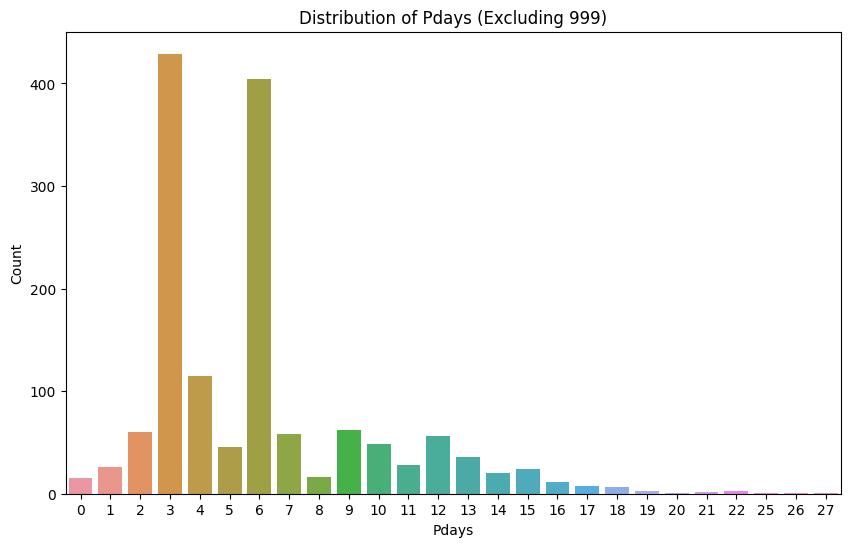

In [41]:

plt.figure(figsize=(10, 6))

# Exclude 999 and sort the remaining values
pdays_figure = df[df['pdays'] != 999]['pdays'].value_counts().sort_index()

sns.barplot(x=pdays_figure.index, y=pdays_figure.values)

plt.title('Distribution of Pdays (Excluding 999)')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.show()

#This is because 999 (or client was not previously contacted) value is more than 90% of the data, therefore I don't include it in the visualization

In [42]:
#see the previously days contacted from the last campaign client affect the success rate

display(df['y'].groupby(df['pdays']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['pdays']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='pdays', columns='y', values='count')


pivot_df['success_rate'] = pivot_df['yes']/ (pivot_df['yes'] + pivot_df['no'])


result = pivot_df.reset_index()[['pdays', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,pdays,y,count
0,0,yes,10
1,0,no,5
2,1,no,18
3,1,yes,8
4,2,yes,36
5,2,no,24
6,3,yes,291
7,3,no,138
8,4,yes,60
9,4,no,55


y   pdays  success_rate
13     13      0.777778
6       6      0.700495
8       8      0.687500
3       3      0.678322
7       7      0.672414
0       0      0.666667
22     22      0.666667
15     15      0.666667
5       5      0.630435
2       2      0.600000
18     18      0.571429
10     10      0.562500
14     14      0.550000
16     16      0.545455
11     11      0.535714
9       9      0.532258
4       4      0.521739
12     12      0.446429
19     19      0.333333
1       1      0.307692
17     17      0.250000
26    999      0.092758
20     20           NaN
21     21           NaN
23     25           NaN
24     26           NaN
25     27           NaN


**Findings:**
1. it is seen that contacting the client after the previous campaign affect the success rate of the clients accepting the offer.

### 4. euribor3m

Euribor 3 month rate - daily indicator

The term "euribor3m" refers to the 3-month EURIBOR rate. EURIBOR stands for Euro Interbank Offered Rate, and it is a daily reference rate, published by the European Money Markets Institute, that represents the interest rate at which Eurozone banks offer to lend unsecured funds to other banks in the interbank market.

The EURIBOR rates are calculated for various maturities, ranging from one week to 12 months, and they reflect the cost of borrowing in euros in the interbank market. The "3m" in "euribor3m" indicates a maturity of 3 months, meaning it is the rate at which banks are willing to lend to each other for a period of 3 months.

example (in the dataset):

- 2803 clients have a euribor3m value of 4.857: This means that for 2803 clients, the 3-month EURIBOR rate was 4.857% at the time of the observation. This is the rate at which banks in the Eurozone were willing to lend unsecured funds to other banks in the interbank market for a period of 3 months.

- 2543 clients have a euribor3m value of 4.962: This means that for 2543 clients, the 3-month EURIBOR rate was 4.962% at the time of the observation.The counts indicate how many clients were observed when the 3-month EURIBOR rate was at a specific value. These rates can affect various financial products, such as loans and mortgages. For instance, clients with variable-rate loans may have their interest rates adjusted based on the changes in the EURIBOR rates.


In [43]:
df['euribor3m'].value_counts()



euribor3m
4.857    2803
4.962    2543
4.963    2437
4.961    1850
4.856    1159
         ... 
3.853       1
3.428       1
0.969       1
0.956       1
3.816       1
Name: count, Length: 316, dtype: int64

In [44]:
df['euribor3m'].nunique()


316

**the column has too many values, therefore, cannot be visualized or counted the percentage.**

### 5. emp.var.rate

explanation:

Negative values: These represent periods when the employment rate was below the historical average, indicating that the labor market was weaker than usual. An emp.var.rate of -3.0 means that the employment variation rate was 3 points below the historical average during that period.

Positive values: These represent periods when the employment rate was above the historical average, indicating that the labor market was stronger than usual. An emp.var.rate of 1.4 means that the employment variation rate was 1.4 points above the historical average during that period.

The numbers provided (e.g., 15843 for the emp.var.rate of 1.4) represent the count of observations or people in your dataset that fall under each emp.var.rate category. For instance, there are 15843 people who were observed during a period when the employment variation rate was 1.4.

In summary, the emp.var.rate values represent the employment variation rate during the period when each observation was recorded. Positive values indicate a stronger labor market, while negative values indicate a weaker labor market relative to the historical average. The numbers provided represent the count of observations under each emp.var.rate category.



In [45]:
df['emp.var.rate'].value_counts()

emp.var.rate
 1.4    15843
-1.8     8982
 1.1     7541
-0.1     3615
-2.9     1612
-3.4     1045
-1.7      755
-1.1      615
-3.0      166
-0.2       10
Name: count, dtype: int64

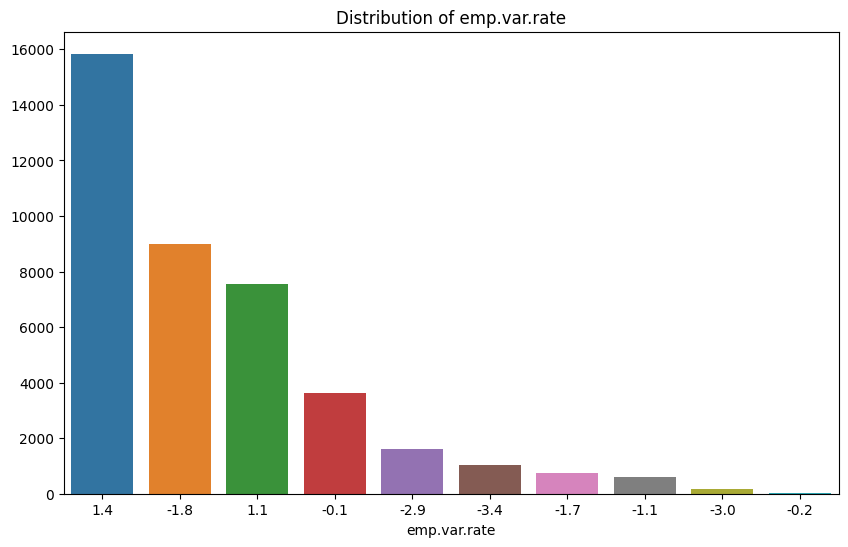

In [46]:
plt.figure(figsize=(10, 6))

# Sort the value counts
empvar_figure = df['emp.var.rate'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=empvar_figure.index, y=empvar_figure.values, order=empvar_figure.index)

plt.title('Distribution of emp.var.rate')
plt.show()

In [47]:
#see the previously days contacted from the last campaign client affect the success rate

display(df['y'].groupby(df['emp.var.rate']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['emp.var.rate']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='emp.var.rate', columns='y', values='count')


pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])


result = pivot_df.reset_index()[['emp.var.rate', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,emp.var.rate,y,count
0,-3.4,no,601
1,-3.4,yes,444
2,-3.0,yes,85
3,-3.0,no,81
4,-2.9,no,1032
5,-2.9,yes,580
6,-1.8,no,7556
7,-1.8,yes,1426
8,-1.7,yes,391
9,-1.7,no,364


y  emp.var.rate  success_rate
4          -1.7      0.517881
1          -3.0      0.512048
5          -1.1      0.469919
0          -3.4      0.424880
2          -2.9      0.359801
3          -1.8      0.158762
6          -0.2      0.100000
7          -0.1      0.063347
9           1.4      0.053651
8           1.1      0.031428


### 6. previous

Number of days the customers contacted before this campaign and for this client

In [48]:
df['previous'].value_counts()

previous
0    34698
1     4451
2      736
3      209
4       66
5       18
6        5
7        1
Name: count, dtype: int64

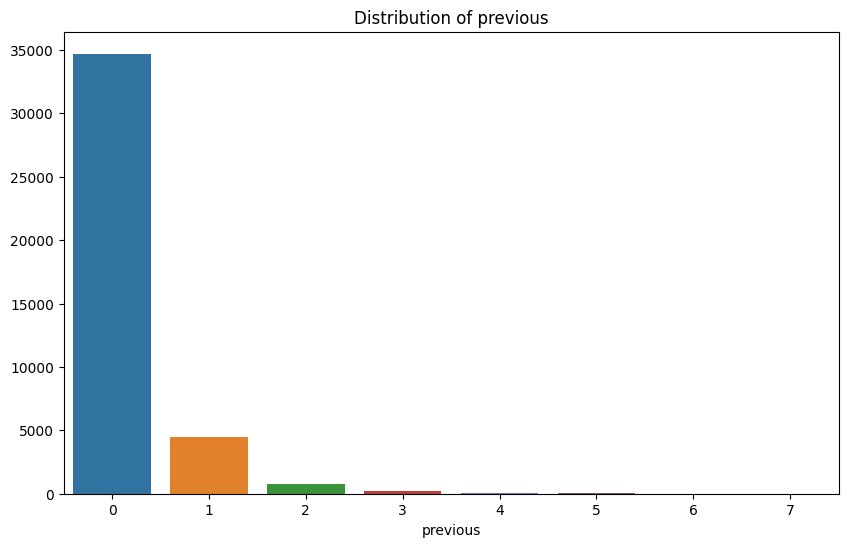

In [49]:
plt.figure(figsize=(10, 6))

# Sort the value counts
previous_figure = df['previous'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=previous_figure.index, y=previous_figure.values, order=previous_figure.index)

plt.title('Distribution of previous')
plt.show()

In [50]:
#see the previously days contacted before this campaign affect the success rate
display(df['y'].groupby(df['previous']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['previous']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='previous', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['previous', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,previous,y,count
0,0,no,31621
1,0,yes,3077
2,1,no,3512
3,1,yes,939
4,2,no,397
5,2,yes,339
6,3,yes,125
7,3,no,84
8,4,yes,36
9,4,no,30


y  previous  success_rate
5         5      0.722222
6         6      0.600000
3         3      0.598086
4         4      0.545455
2         2      0.460598
1         1      0.210964
0         0      0.088679
7         7           NaN


**Findings:**
1. The more we contact the clients, the success rate of the clients accepting the term deposits will increase.

# **Influence of All Categorical Columns**

### 1. job

In [51]:
df['job'].value_counts()

job
admin.           10191
blue-collar       9012
technician        6592
services          3866
management        2853
retired           1674
entrepreneur      1420
self-employed     1381
housemaid         1031
unemployed         987
student            852
others             325
Name: count, dtype: int64

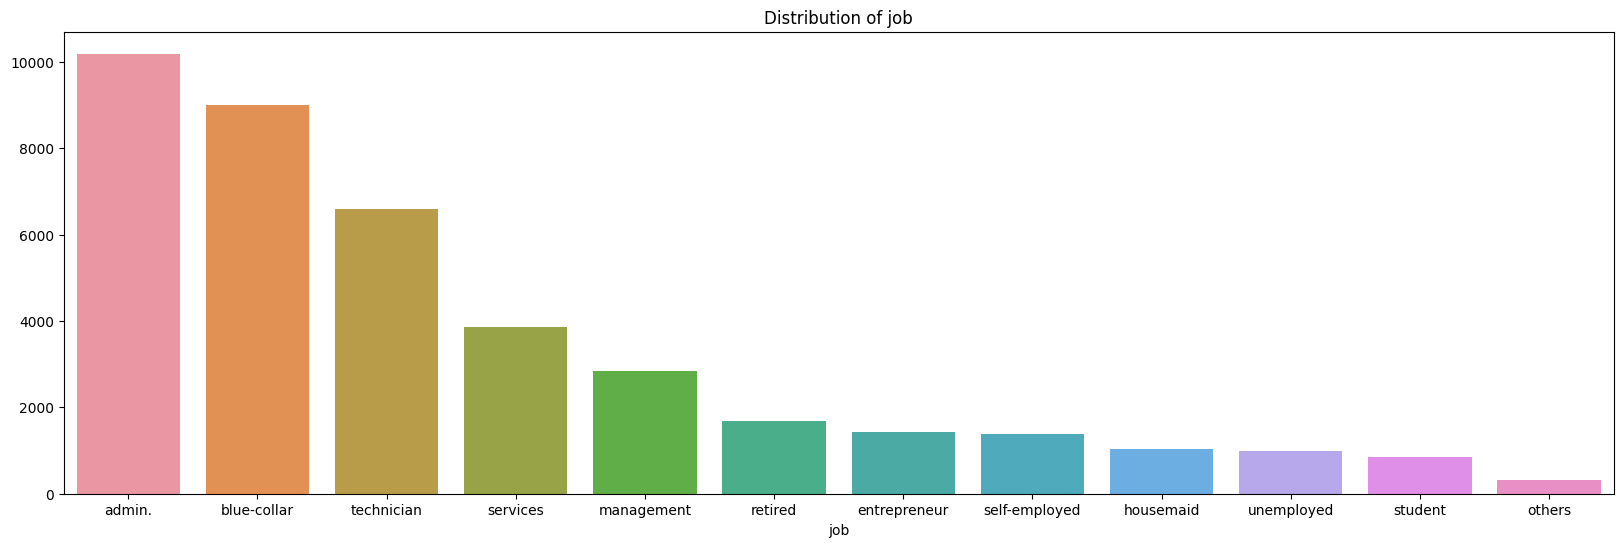

In [52]:
plt.figure(figsize=(20, 6))

# Sort the value counts
job_figure = df['job'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=job_figure.index, y=job_figure.values, order=job_figure.index)

plt.title('Distribution of job')
plt.show()

In [53]:
display(df['y'].groupby(df['job']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['job']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='job', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['job', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,job,y,count
0,admin.,no,8869
1,admin.,yes,1322
2,blue-collar,no,8390
3,blue-collar,yes,622
4,entrepreneur,no,1299
5,entrepreneur,yes,121
6,housemaid,no,928
7,housemaid,yes,103
8,management,no,2529
9,management,yes,324


y             job  success_rate
9         student      0.309859
6         retired      0.253286
11     unemployed      0.144883
0          admin.      0.129722
5          others      0.113846
4      management      0.113565
10     technician      0.107555
7   self-employed      0.106445
3       housemaid      0.099903
2    entrepreneur      0.085211
8        services      0.081738
1     blue-collar      0.069019


**Findings:**
1. The highest success rate comes from student and retired which accumulates for 30.9% and 25.3%, respectively.

### 2. Marital

In [54]:
df['marital'].value_counts()

marital
married     24331
single      11284
divorced     4490
others         79
Name: count, dtype: int64

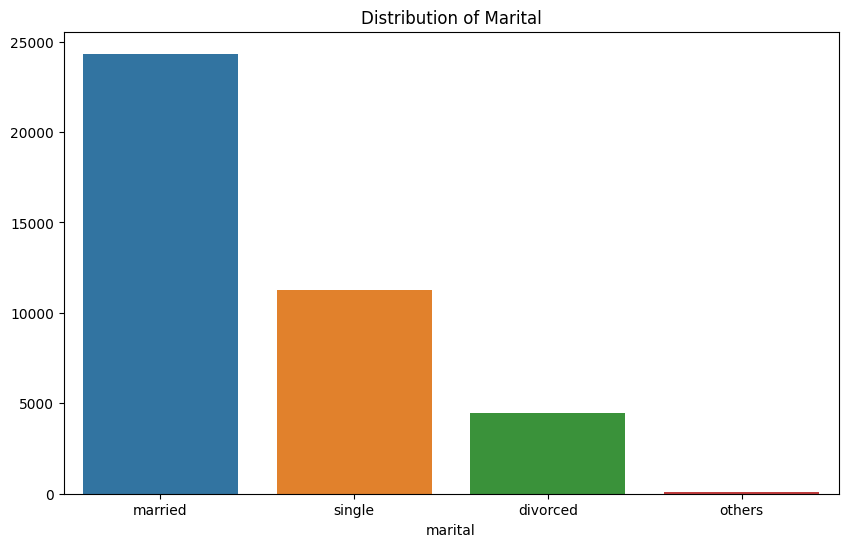

In [55]:
plt.figure(figsize=(10, 6))

# Sort the value counts
marital_figure = df['marital'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=marital_figure.index, y=marital_figure.values, order=marital_figure.index)

plt.title('Distribution of Marital')
plt.show()

In [56]:
display(df['y'].groupby(df['marital']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['marital']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='marital', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['marital', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,marital,y,count
0,divorced,no,4022
1,divorced,yes,468
2,married,no,21860
3,married,yes,2471
4,others,no,67
5,others,yes,12
6,single,no,9703
7,single,yes,1581


y   marital  success_rate
2    others      0.151899
3    single      0.140110
0  divorced      0.104232
1   married      0.101558


**Findings:**
1. Surprisingly, clients' marital status that has highest successful rate comes from those who are still labeled 'others' (15.18%) and 'single' (14.01%)

### 3. Education

In [57]:
display(df['education'].value_counts())
display(df['education'].value_counts()/len(df))

education
university.degree      11886
high.school             9292
basic.9y                5894
professional.course     5115
basic.4y                4058
basic.6y                2231
others                  1690
illiterate                18
Name: count, dtype: int64

education
university.degree      0.295789
high.school            0.231236
basic.9y               0.146675
professional.course    0.127289
basic.4y               0.100985
basic.6y               0.055520
others                 0.042057
illiterate             0.000448
Name: count, dtype: float64

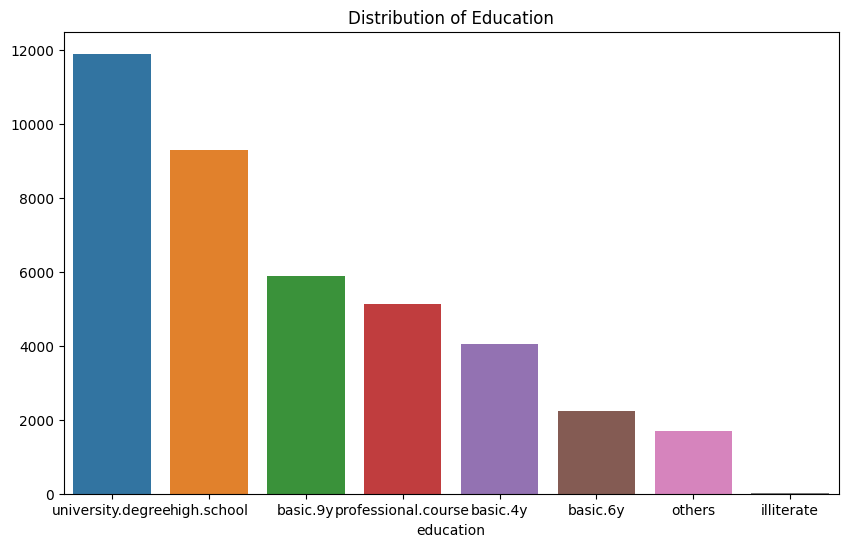

In [58]:
plt.figure(figsize=(10, 6))

# Sort the value counts
education_figure = df['education'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=education_figure.index, y=education_figure.values, order=education_figure.index)

plt.title('Distribution of Education')
plt.show()

In [59]:
display(df['y'].groupby(df['education']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['education']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='education', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['education', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,education,y,count
0,basic.4y,no,3641
1,basic.4y,yes,417
2,basic.6y,no,2050
3,basic.6y,yes,181
4,basic.9y,no,5434
5,basic.9y,yes,460
6,high.school,no,8282
7,high.school,yes,1010
8,illiterate,no,14
9,illiterate,yes,4


y            education  success_rate
4           illiterate      0.222222
5               others      0.145562
7    university.degree      0.137557
6  professional.course      0.113196
3          high.school      0.108696
0             basic.4y      0.102760
1             basic.6y      0.081130
2             basic.9y      0.078045


**Findings:**
1. illiterate education may have the biggest success rate, this is because those who are illiterate are only 18 clients.
2. Most impactful clients' education comes from those who are university degree, which accumulates for 13.75% and around 29.5% clients are university degree and those coming from 'others' education has a success rate of 14.55% but only around 4.2% clients' education labeled 'others'.

### 4. housing

In [60]:
df['housing'].value_counts()

housing
yes    21570
no     18614
Name: count, dtype: int64

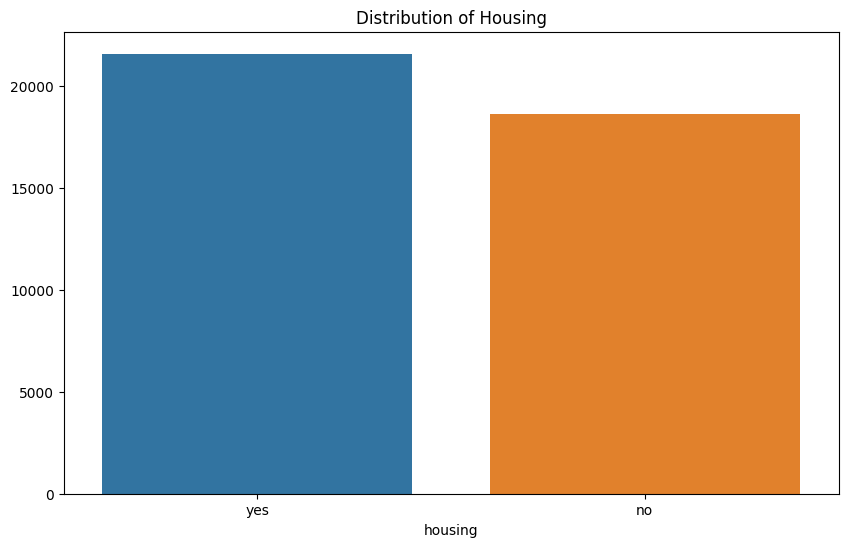

In [61]:
plt.figure(figsize=(10, 6))

# Sort the value counts
housing_figure = df['housing'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=housing_figure.index, y=housing_figure.values, order=housing_figure.index)

plt.title('Distribution of Housing')
plt.show()

In [62]:
display(df['y'].groupby(df['housing']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['housing']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='housing', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['housing', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,housing,y,count
0,no,no,16589
1,no,yes,2025
2,yes,no,19063
3,yes,yes,2507


y housing  success_rate
1     yes      0.116226
0      no      0.108789


**Findings:**
1. it does not matter whether the customer has house loan or not because the success rate for both are only 10.8-10.11.6%.

### 5. loan

In [63]:
df['loan'].value_counts()

loan
no     33936
yes     6248
Name: count, dtype: int64

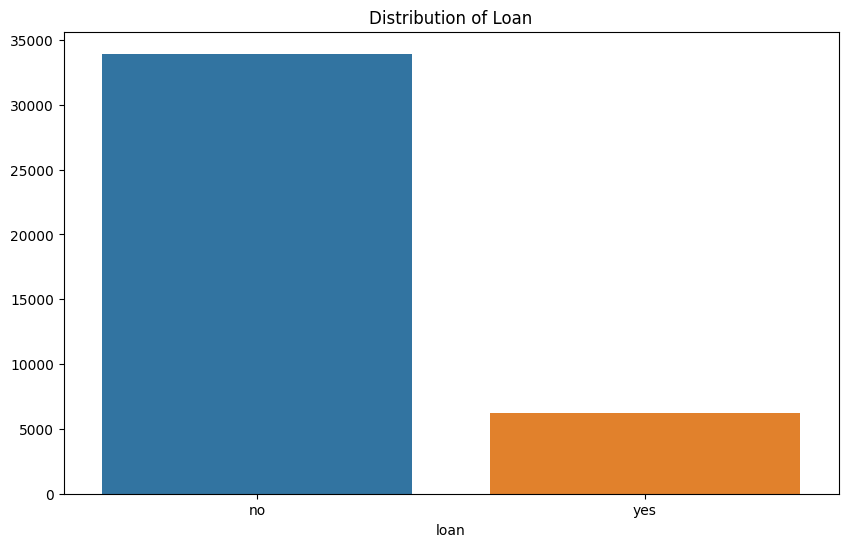

In [64]:
plt.figure(figsize=(10, 6))

# Sort the value counts
loan_figure = df['loan'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=loan_figure.index, y=loan_figure.values, order=loan_figure.index)

plt.title('Distribution of Loan')
plt.show()

In [65]:
display(df['y'].groupby(df['loan']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['loan']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='loan', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['loan', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,loan,y,count
0,no,no,30087
1,no,yes,3849
2,yes,no,5565
3,yes,yes,683


y loan  success_rate
0   no      0.113419
1  yes      0.109315


**Findings:**
1. it does not matter whether the customer has a personal loan or not because the success rate for both are only 10.9-11.3%.

### 6. Contact

In [66]:
df['contact'].value_counts()

contact
cellular     25573
telephone    14611
Name: count, dtype: int64

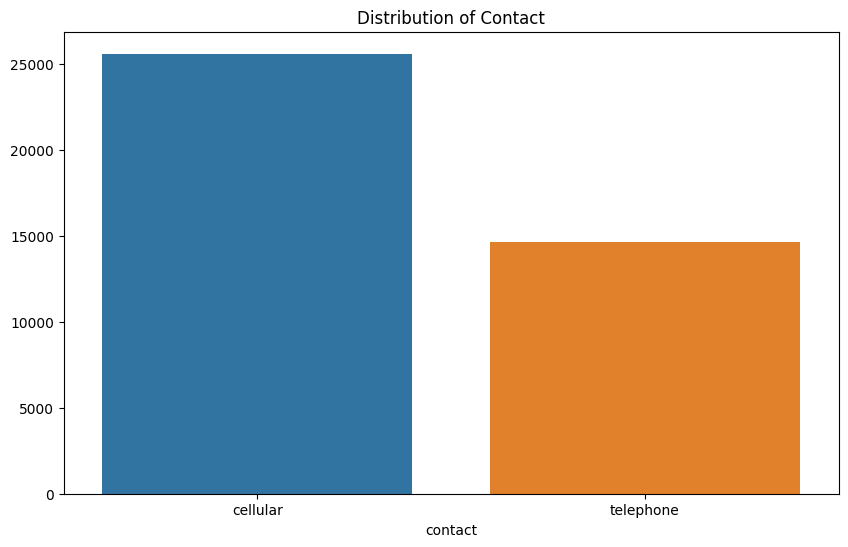

In [67]:
plt.figure(figsize=(10, 6))

# Sort the value counts
contact_figure = df['contact'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=contact_figure.index, y=contact_figure.values, order=contact_figure.index)

plt.title('Distribution of Contact')
plt.show()

In [68]:
display(df['y'].groupby(df['contact']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['contact']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='contact', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['contact', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,contact,y,count
0,cellular,no,21813
1,cellular,yes,3760
2,telephone,no,13839
3,telephone,yes,772


y    contact  success_rate
0   cellular      0.147030
1  telephone      0.052837


**Findings:**
1. It is seen that contacting through cellular is way more effective compared to telephone in affecting the clients into joining the term deposits.

### 7. month


In [69]:
df['month'].value_counts()

month
may    13416
jul     7022
aug     6045
jun     5143
nov     4024
apr     2573
oct      697
sep      554
mar      534
dec      176
Name: count, dtype: int64

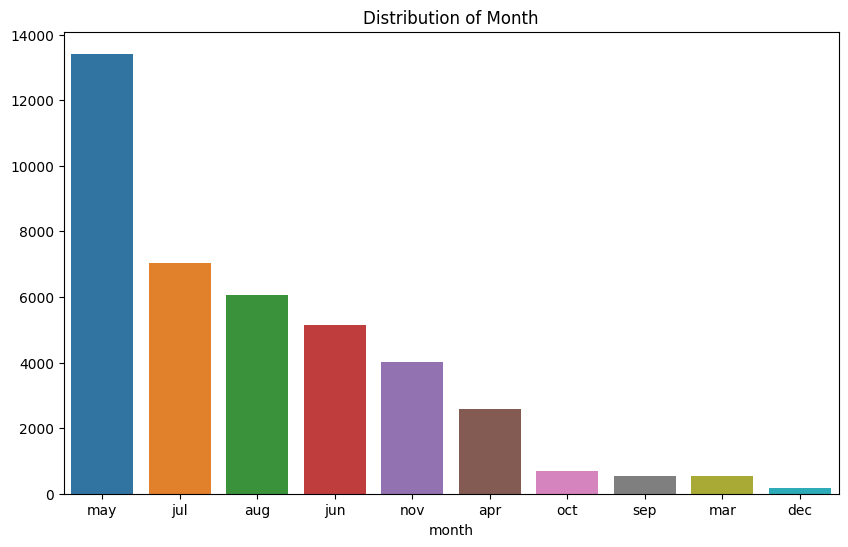

In [70]:
plt.figure(figsize=(10, 6))

# Sort the value counts
month_figure = df['month'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=month_figure.index, y=month_figure.values, order=month_figure.index)

plt.title('Distribution of Month')
plt.show()

In [71]:
display(df['y'].groupby(df['month']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['month']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='month', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['month', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,month,y,count
0,apr,no,2049
1,apr,yes,524
2,aug,no,5408
3,aug,yes,637
4,dec,no,90
5,dec,yes,86
6,jul,no,6386
7,jul,yes,636
8,jun,no,4595
9,jun,yes,548


y month  success_rate
5   mar      0.507491
2   dec      0.488636
9   sep      0.445848
8   oct      0.439024
0   apr      0.203653
4   jun      0.106553
1   aug      0.105376
7   nov      0.101640
3   jul      0.090572
6   may      0.064699


**Findings:**
1. Cannot find anything because the values are way different.

### 8. day_of_week

In [72]:
df['day_of_week'].value_counts()

day_of_week
thu    8428
mon    8320
wed    7937
tue    7876
fri    7623
Name: count, dtype: int64

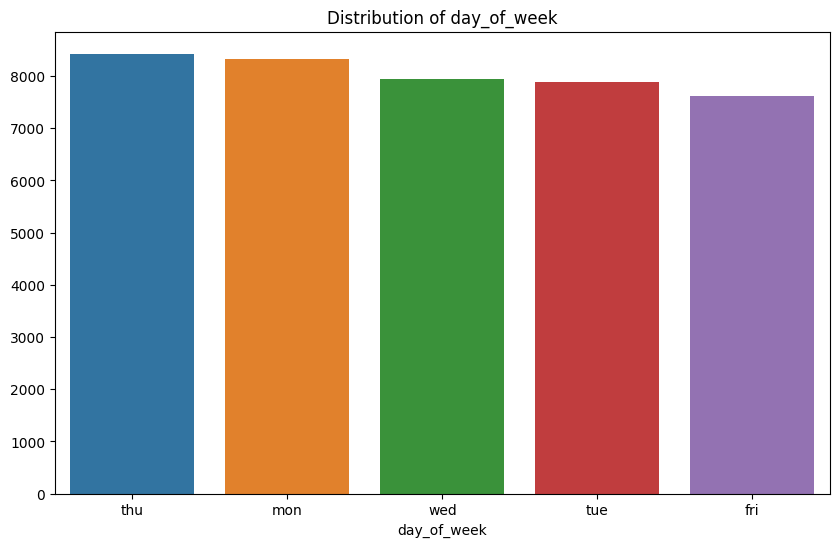

In [73]:
plt.figure(figsize=(10, 6))

# Sort the value counts
day_of_week_figure = df['day_of_week'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=day_of_week_figure.index, y=day_of_week_figure.values, order=day_of_week_figure.index)

plt.title('Distribution of day_of_week')
plt.show()

In [74]:
display(df['y'].groupby(df['day_of_week']).value_counts().reset_index())


grouped_df = df['y'].groupby(df['day_of_week']).value_counts().reset_index(name='count')


pivot_df = grouped_df.pivot(index='day_of_week', columns='y', values='count')

# Calculate acceptance rate
pivot_df['success_rate'] = pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])

result = pivot_df.reset_index()[['day_of_week', 'success_rate']].sort_values(by='success_rate', ascending=False)

print(result)

,day_of_week,y,count
0,fri,no,6795
1,fri,yes,828
2,mon,no,7491
3,mon,yes,829
4,thu,no,7410
5,thu,yes,1018
6,tue,no,6953
7,tue,yes,923
8,wed,no,7003
9,wed,yes,934


y day_of_week  success_rate
2         thu      0.120788
4         wed      0.117677
3         tue      0.117191
0         fri      0.108619
1         mon      0.099639


**Findings:**
1. All five days do not really make any effect on the success rate as the five days range from 9.9 - 12%

# **7. Feature Engineering**

Those categorical columns are:
1. job
2. marital
3. education
4. housing
5. loan
6. contact
7. month
8. day_of_week

In [75]:
print("check the total unique values of each categorical columns:")
print("")
print(f"job:{df['job'].nunique()}")
print(f"marital:{df['marital'].nunique()}")
print(f"education:{df['education'].nunique()}")
print(f"housing:{df['housing'].nunique()}")
print(f"loan:{df['loan'].nunique()}")
print(f"contact:{df['contact'].nunique()}")
print(f"month:{df['month'].nunique()}")
print(f"day_of_week:{df['day_of_week'].nunique()}")
print(f"poutcome:{df['poutcome'].nunique()}")


check the total unique values of each categorical columns:

job:12
marital:4
education:8
housing:2
loan:2
contact:2
month:10
day_of_week:5
poutcome:3


**Encoding**

Encoding is the process of converting data from one format to another, which is usually done on categorical data to become numerical data before it can be used to train a model.

In the dataset there are several features which are categorical data so we need to encode the categorical data. The encoding to be performed is as follows:
* One-Hot Encoding: contact, loan, housing, marital, poutcome because feature is a nominal variable that has <=3 categories (we use One-Hot Encoding compared to Binary Encoding because the number of categories is not too many)
* Binary Encoding: month, day_of_week, education, job, because feature is a nominal variable that has 8 categories (we use Binary Encoding instead of One-Hot Encoding because the number of categories is quite large so we want to create fewer dummy variables and reduce the overfitting that occurs when the variables used in the build more models)

In [76]:
#encoding

#label encoding back the target (y)

df['y'] = df['y'].replace('yes', 1)
df['y'] = df['y'].replace('no', 0)

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['contact','loan','housing','marital','poutcome']),
    ('binary', ce.BinaryEncoder(), ['month','day_of_week','education','job'])
], remainder='passthrough')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40184 entries, 0 to 40183
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40184 non-null  int64  
 1   job             40184 non-null  object 
 2   marital         40184 non-null  object 
 3   education       40184 non-null  object 
 4   housing         40184 non-null  object 
 5   loan            40184 non-null  object 
 6   contact         40184 non-null  object 
 7   month           40184 non-null  object 
 8   day_of_week     40184 non-null  object 
 9   duration        40184 non-null  int64  
 10  campaign        40184 non-null  int64  
 11  pdays           40184 non-null  int64  
 12  previous        40184 non-null  int64  
 13  poutcome        40184 non-null  object 
 14  emp.var.rate    40184 non-null  float64
 15  cons.price.idx  40184 non-null  float64
 16  cons.conf.idx   40184 non-null  float64
 17  euribor3m       40184 non-null 

In [78]:
X = df.drop(['y', 'duration'], axis=1)
y = df['y']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)


In [79]:
testing = pd.DataFrame(transformer.fit_transform(xtrain),columns=transformer.get_feature_names_out())
testing.head()

,onehot__contact_telephone,onehot__loan_yes,onehot__housing_yes,onehot__marital_married,onehot__marital_others,onehot__marital_single,onehot__poutcome_nonexistent,onehot__poutcome_success,binary__month_0,binary__month_1,...,binary__job_3,remainder__age,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,58.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.153,5195.8
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,34.0,1.0,999.0,0.0,-1.8,93.075,-47.1,1.423,5099.1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,56.0,1.0,999.0,1.0,-0.1,93.200,-42.0,4.021,5195.8
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,36.0,3.0,999.0,0.0,1.4,93.444,-36.1,4.965,5228.1
4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,42.0,3.0,999.0,0.0,1.4,93.444,-36.1,4.962,5228.1


# **8. Modeling & Evaluation**

In [80]:
#model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svm = SVC()




### Model Benchmarking : K-Fold (Default Parameter)

In [81]:
models = [logreg, knn, dt, rf, xgb, svm]
score = []
mean = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer), 
        ('model', i)])
    model_cv = cross_val_score(estimator, xtrain, ytrain, cv=skfold, scoring='precision')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

df_without_resampling = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','SVM'],
              'mean precision': mean,
              'sdev': std}).set_index('model').sort_values(by='mean precision', ascending=False)

df_without_resampling

,mean precision,sdev
model,,
Logistic Regression,0.682609,0.045635
SVM,0.639143,0.039142
XGBoost,0.589134,0.028838
Random Forest,0.550440,0.026416
KNN,0.521772,0.019189
Decision Tree,0.303244,0.013417


In [82]:
Default_Precision_Score = df_without_resampling.loc['Logistic Regression', 'mean precision']

### Comparing Model Benchmarking with Resampling for Every Model

In [83]:
models = [logreg, knn, dt, rf, xgb, svm]
score = []
mean = []
std = []
mean_over = []
std_over = []
mean_under = []
std_under = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('preprocess', transformer), 
        ('model', i)])
    model_cv = cross_val_score(estimator, xtrain, ytrain, cv=skfold, scoring='precision')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

    # Oversampling
    estimator_over = Pipeline([
        ('preprocess', transformer),
        ('resampler', RandomOverSampler()),
        ('model', i)])
    model_cv_over = cross_val_score(estimator_over, xtrain, ytrain, cv=skfold, scoring='precision')
    mean_over.append(model_cv_over.mean())
    std_over.append(model_cv_over.std())

    # Undersampling
    estimator_under = Pipeline([
        ('preprocess', transformer),
        ('resampler', RandomUnderSampler()),
        ('model', i)])
    model_cv_under = cross_val_score(estimator_under, xtrain, ytrain, cv=skfold, scoring='precision')
    mean_under.append(model_cv_under.mean())
    std_under.append(model_cv_under.std())


#results

results_original = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM'],
                        'mean precision': mean,
                        'sdev': std}).set_index('model').sort_values(by='mean precision', ascending=False)

results_OVER = pd.DataFrame({'model': ['Logistic Regression_OVER', 'KNN_OVER', 'Decision Tree_OVER', 'Random Forest_OVER', 'XGBoost_OVER', 'SVM_OVER'],
                        'mean precision': mean_over,
                        'sdev': std_over}).set_index('model').sort_values(by='mean precision', ascending=False)

results_UNDER = pd.DataFrame({'model': ['Logistic Regression_UNDER', 'KNN_UNDER', 'Decision Tree_UNDER', 'Random Forest_UNDER', 'XGBoost_UNDER', 'SVM_UNDER'],
                        'mean precision': mean_under,
                        'sdev': std_under}).set_index('model').sort_values(by='mean precision', ascending=False)


print('Modeling without Resampling: ')
display(results_original)

print('')
print('Modeling without Oversampling: ')
display(results_OVER)

print('')
print('Modeling without Undersampling: ')
display(results_UNDER)


Modeling without Resampling: 


,mean precision,sdev
model,,
Logistic Regression,0.682609,0.045635
SVM,0.639143,0.039142
XGBoost,0.589134,0.028838
Random Forest,0.546466,0.020489
KNN,0.521772,0.019189
Decision Tree,0.304646,0.014944



Modeling without Oversampling: 


,mean precision,sdev
model,,
Random Forest_OVER,0.474066,0.018483
XGBoost_OVER,0.370814,0.012013
Decision Tree_OVER,0.314454,0.010999
KNN_OVER,0.278667,0.004067
Logistic Regression_OVER,0.257453,0.016427
SVM_OVER,0.246485,0.007807



Modeling without Undersampling: 


,mean precision,sdev
model,,
SVM_UNDER,0.444065,0.019985
Random Forest_UNDER,0.296894,0.008885
XGBoost_UNDER,0.285518,0.005074
Logistic Regression_UNDER,0.258440,0.013845
KNN_UNDER,0.257989,0.004223
Decision Tree_UNDER,0.186284,0.002493


**It is seen that Logistic Regression model without resampling is the best model for the precision amongst the other models**

### Model Benchmarking : Test Data (Without Resampling)

In [84]:
models = [logreg, knn, dt, rf, xgb, svm]
score_precision = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    
    estimator.fit(xtrain, ytrain)
    return(estimator, estimator.predict(xtest), xtest)

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']):
    estimator, y_pred, x_test = y_pred_func(i)
    score_precision.append(precision_score(ytest, y_pred))
    print(j, '\n', classification_report(ytest, y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM'],
              'precision score':score_precision}).set_index('model').sort_values(by='precision score', ascending=False)


Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7132
           1       0.68      0.18      0.28       905

    accuracy                           0.90      8037
   macro avg       0.79      0.58      0.61      8037
weighted avg       0.88      0.90      0.87      8037

KNN 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7132
           1       0.48      0.26      0.34       905

    accuracy                           0.88      8037
   macro avg       0.69      0.61      0.64      8037
weighted avg       0.86      0.88      0.87      8037

Decision Tree 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7132
           1       0.30      0.33      0.31       905

    accuracy                           0.84      8037
   macro avg       0.60      0.62      0.61      8037
weighted avg       0.84      0

,precision score
model,
Logistic Regression,0.682403
SVM,0.618705
XGBoost,0.581818
Random Forest,0.516327
KNN,0.475149
Decision Tree,0.295678


**Takeaways:**

1. It is seen again that logistic regression model has the best performance in the test data.
2. We are going to try oversampling and undersampling to see if we can get a better result.


# **Hyperparam Tuning**

### Find Best Param in Logistic Regression Model

**Explanation of the param in Logistic Regression**

1. penalty: The penalty (or regularization term) is a term added to the loss function that discourages overly complex models which can lead to overfitting, which consists of three types:
- l1: L1 regularization. Adds the sum of the absolute values of the coefficients to the loss.
- l2: L2 regularization. Adds the sum of the squared values of the coefficients to the loss.
- elasticnet: A combination of L1 and L2 regularization.
- none: No regularization is applied.

2. C: This is the inverse of the regularization strength, and smaller values indicate stronger regularization. It is a positive float where smaller values of C specify stronger regularization. It is the inverse of the alpha parameter in Ridge regression.

3. fit_intercept: Whether to add an intercept term to the model. If set to False, no intercept will be used in calculations.

4. solver: This is the algorithm to use in the optimization problem. Options incude:
- newton-cg: Newton’s method.
- lbfgs: Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm (default).
- liblinear: Library for Large Linear Classification. Uses a coordinate descent algorithm. Supports L1 penalty.
- sag: Stochastic Average Gradient descent.
- saga: A variant of SAG that supports the non-smooth penalty="l1" option. This is the only solver that supports penalty="elasticnet".

5. max_iter: The maximum number of iterations for the solver to converge.

6. multi_class: If you have a multiclass classification problem, this parameter defines the algorithm to use. Options include:
- auto: Chooses ovr if data is binary, or if solver='liblinear', and otherwise selects multinomial.
- ovr: Trains n_classes binary classifiers.
- multinomial: The loss minimised is the multinomial loss fit across the entire probability distribution.

7. class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [85]:
logreg = LogisticRegression()
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',logreg)
])

In [86]:
logreg_hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 500, 1000, 2000],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__class_weight': [None, 'balanced']
}


In [87]:
# Create the random search
random_search = RandomizedSearchCV(estimator, param_distributions=logreg_hyperparam_space, scoring='precision', n_iter=100, cv=5, verbose=1, random_state=100, n_jobs=-1)

# Fit the random search to your data
random_search.fit(xtrain, ytrain)

# Print the best parameters
print("Best parameters:", random_search.best_params_)

# Print the best score
print("Best precision:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best parameters: {'model__solver': 'sag', 'model__penalty': 'l2', 'model__multi_class': 'ovr', 'model__max_iter': 2000, 'model__fit_intercept': True, 'model__class_weight': None, 'model__C': 0.1}
Best precision: 0.697949467630478


In [88]:
# Comparison of Precision Score before and after tuning:
print("Precision score Logistic Regression Model before tuning:", Default_Precision_Score)
print("Precision score Logistic Regression Model after tuning:", random_search.best_score_)

Precision score Logistic Regression Model before tuning: 0.6826085689919706
Precision score Logistic Regression Model after tuning: 0.697949467630478


**It is seen that Logistic Regression Model after the hyperparameter tuning has a slight increase in the precision score compared to the default parameters.**


### Compare the Classification Report



In [89]:
#default (without tuning)
report_default = classification_report(ytest, y_pred)

#after tuning
y_pred_tuned = random_search.best_estimator_.predict(xtest)
report_tuned = classification_report(ytest, y_pred_tuned)


print('Classification Report Logistic Regression Model without Tuning : \n', report_default)
print('Classification Report Logistic Regression Model after Tuning : \n', report_tuned)

Classification Report Logistic Regression Model without Tuning : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7132
           1       0.62      0.19      0.29       905

    accuracy                           0.90      8037
   macro avg       0.76      0.59      0.62      8037
weighted avg       0.87      0.90      0.87      8037

Classification Report Logistic Regression Model after Tuning : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7132
           1       0.67      0.18      0.28       905

    accuracy                           0.90      8037
   macro avg       0.79      0.58      0.61      8037
weighted avg       0.88      0.90      0.87      8037



**It is also seen that Logistic Regression Model after the hyperparameter tuning has a slight increase in the classification report compared to the default parameters.**

### Feature Importances

In [90]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['contact','loan','housing','marital','poutcome']),
    ('binary', ce.BinaryEncoder(), ['month','day_of_week','education','job'])
], remainder='passthrough')

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
import pandas as pd

# Define the column transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['contact','loan','housing','marital','poutcome']),
    ('binary', ce.BinaryEncoder(), ['month','day_of_week','education','job'])
], remainder='passthrough')

# Define the model
model = LogisticRegression(solver='sag', penalty='l2', multi_class='ovr', max_iter=2000, fit_intercept=True, class_weight=None, C=0.1)

# Create the pipeline
pipeline_importance = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])

# Train the model
pipeline_importance.fit(xtrain, ytrain)

# Get the model coefficients
coefs = pipeline_importance.named_steps['model'].coef_

# Get the transformed feature names
transformer.fit(xtrain)
onehot_features = transformer.named_transformers_['onehot'].get_feature_names_out(['contact','loan','housing','marital','poutcome'])
binary_features = transformer.named_transformers_['binary'].get_feature_names_out(input_features=['month','day_of_week','education','job'])
all_features = list(onehot_features) + list(binary_features)

# Create a DataFrame with coefficients and feature names
feature_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': coefs[0, :len(all_features)]
})

# Sort features by absolute importance
feature_importances['Abs_Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Abs_Importance', ascending=False)


feature_importances = feature_importances.reset_index(drop=True)

display(feature_importances)

,Feature,Importance,Abs_Importance
0,month_3,-0.104755,0.104755
1,month_2,0.074199,0.074199
2,contact_telephone,-0.061967,0.061967
3,month_1,-0.053611,0.053611
4,month_0,0.041895,0.041895
5,job_1,-0.039244,0.039244
6,education_3,0.035414,0.035414
7,marital_single,0.033987,0.033987
8,day_of_week_1,-0.030674,0.030674
9,poutcome_nonexistent,0.028015,0.028015


**Findings:**
1. The two most influential columns towards y (target) are month and contact 

In [92]:
print('Classification Report Logistic Regression Model after Tuning : \n', report_tuned)

Classification Report Logistic Regression Model after Tuning : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7132
           1       0.67      0.18      0.28       905

    accuracy                           0.90      8037
   macro avg       0.79      0.58      0.61      8037
weighted avg       0.88      0.90      0.87      8037



# **CONCLUSION**

Based on the results of the classification report from our model, we can conclude/draw the conclusion that if later we use our model to filter/filter the list of candidates that we will try to offer, then our model can reduce 90% of candidates (precision score of 0) who are not interested in not approaching us, and our model can get 67% of interested candidates from all interested candidates. (all of this is based on precision)

Our model has an accuracy of predicting interested candidates of 67% (precision), so every time our model predicts that a candidate is interested, then the probability of his guess being correct is approximately 67%. So there will still be 33% of interested / potential candidates that will not accept the term deposits offer.(based on precision).


Suppose the cost for screening/filtering data per candidate is $35 - $60, therefore I'm going to use the median for the calculation, which is $47.5 (based on sources from https://www.magellan-solutions.com/blog/cost-of-telemarketing/#:~:text=The%20average%20cost%20of%20a,of%20%24300%20per%201%2C000%20names).


According from the data: https://www.servicebell.com/post/cold-calling-statistics#:~:text=There%20are%20a%20few%20statistics,3%20minutes%20and%2014%20seconds.
1. average of successful call is around 5 minutes and 40 seconds. (340 seconds)
2. average of unsuccessful call is around 3 mins and 14 seconds. (194 seconds)
Therefore, I am going to use the median between those successful and unsuccessful call duration to see the time efficiency in comparing without and with model. The median between 194 and 340 seconds is 267 seconds.





Example case: (out of 500 people, 250 interested (potential), 250 not interested) 

Without Model (all candidates we check and offer):
- Total Cost => 500 x 47.5 USD = 23,750 USD
- Total time spent => 267 x 500 = 133,500 seconds = 2225 minutes = 37 hours and 5 minutes
- Total Interested Candidates obtained => 250 clients (Because we offer to every client)
- Total Interested Candidates who did not get => 0 people (because we offer all)
- Wasted costs => 250 x 47.5 USD = 11,875 USD (because 250 refused and it will be wasted)
- Savings amount => 0 USD
- Total time saved => 0 seconds

By Model (only candidates predicted by interested models we check and offer):
- Total Cost => (0.1 x 250 x 47.5 USD) + (0.67 x 250 x 47.5)  =  10,687.5 USD + 7,956.25 USD = 18,643.75 USD
- Total time spent => (0.1 x 250 + 0.67 x 250) x 267 seconds = 51,264 seconds = 854 minutes and 24 seconds.
- Total Interested Candidates obtained => 0.67 x 250 = 167 clients (approximately)
- Total Interested Candidates not obtained => 0.33 x 250 = 83 clients (approximately)
- Wasted costs => (0.1 x 250 x 47.5 USD) = 10,687.5 USD
- Amount of savings => 18,643.75 - 10,687.5 = 7,956.25 USD
- Total time saved = 167 x 267 seconds = 44,589 seconds = 743 minutes and 9 seconds.

Based on the sample calculation, it appears that by using our model, the company will save substantial costs without sacrificing too many potential candidates/candidates who are interested.



# **RECOMMENDATION**

Things to do to create a better model:
1. Try to use grid_search to get a better params in the logistic regression model, therefore, an increase in the precision score.
2. Adding other features that may have strong correlation in accepting the term deposits offer.
3. Analyze data that our model incorrectly predicts to know the reason and the characteristics behind it.
4. Ask all the clients to answer all the columns for necessary information needed to modelling process.
5. Try using other ML techniques such as Neural Networks.


Things to do for the business: 
1. Try contacting those potential customers by cellular instead of telephone as 63.6% of the bank clients called with celullar and the success rate is 14.7% compared to telephone that is only 5.2%.
2. Focus more on those whose marital status are 'others' and 'single' as those two marital status have the highest interest rate around 15.18% and 14%, respectively compared to those who are married or divorced which are only around 10% for both of the marital status.
3. Focus more on customers that are still student as their success rate is the highest amongst the others which accummulates for 30.9%.
4. Duration of the call really determines if the potential customers will accept the term deposits offer as those bank clients who called or reached the customers with the longest duration accumulates to 52.1% of success rate of accepting the term deposit offer. Therefore, it is suggested that in contacting those potentials with a longer duration as the longer the duration, the higher the success rate of accepting the term deposits offer.

